### Basic Steps of Data Visualization Project
0. [Import relevant libararies and data](#ILD)
   - Libraries
        * Numpy
        * Pandas
        * Matplotlib
        * Seaborn
   - Data 
1. [Explore Data](#ED)
    * [Basic Information](#BI) : Shape, datatypes, head and tail
    * [Numerical Distribution](#NDf) : histogram, describe
    * [Categorical Distribution](#CDf) : countplot, describe(include=['object'])
    * [Segmentation](#SEG) : boxplot/violine, groupby
    
2. [Clean Data](#CD)
    * [Unwanted Observation](#UO) : drop_duplicate
    * [Structural Errors](#SE)
    * [Unwanted Outliers](#UO)
    * [Missing Categorial Data](#MCD)
    * [Missing Numerical Data](#MND)
    * [Flag and fill missing data](#FFMD)
   
3. [Communication/Project Delivary](#PD)
    * [Jupyter Notebook](#JN)
    * [Executable Script](#ES)

<br>

#### Import important libraries.

In [2]:
from __future__ import print_function  # Compatability with Python 3
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [3]:
import sys
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.22.0


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

In [3]:
df = pd.read_csv('./0.Data/kc_house_data.csv')

> ### Basic Information

> #### Shape

**Display the <span style="color:royalblue">dimension</span> of the features.**

In [3]:
row,col = df.shape
print ("Total number of row {0}".format(row))
print ("Total number of col {}".format(col))

Total number of row 21613
Total number of col 21


#### Datatypes

> Why am I checking for datatypes?  
  Idea is to see if any data types are incorrect.  
  - for example       
              check to see if numeric data should be categorial   
              or categorial data should be numeric instead.

**Display the <span style="color:royalblue">datatypes</span> of the features.**

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

> Look at the head of the dataframe

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


date should be datetime object
should I worry about converting 
    grade to categorial
    condition to categorial as well

**Display the columns or feature which are <span style="color:royalblue"> numeric</span>.** 

In [6]:
for feature in df.dtypes[df.dtypes=='int64'].index:
    print (feature)

id
bedrooms
sqft_living
sqft_lot
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
sqft_living15
sqft_lot15


**Display the columns or feature which are <span style="color:royalblue"> float</span>.** 

In [7]:
for feature in df.dtypes[df.dtypes=='float64'].index:
    print (feature)

price
bathrooms
floors
lat
long


**Display the columns or feature which are <span style="color:royalblue"> objects</span>.** 

In [8]:
for feature in df.dtypes[df.dtypes=='object'].index:
    print (feature)

date


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

----

<span id="NDf"></span>
> # Distributions of numerical features

<br>
**In order to get a quick visualization of numeric feature, the Pandas <span style="color:royalblue">histogram grid</span> for all the numeric features is plotted.** 

Idea is to look out for few things in the distribution:

    Distributions that are unexpected 
    Potential outliers that don't make sense
    Sparse data 
    Features that should be binary
    Boundaries that don't make sense 
    Potential measurement errors
    
    
To help the histogram summary statistics is also provided

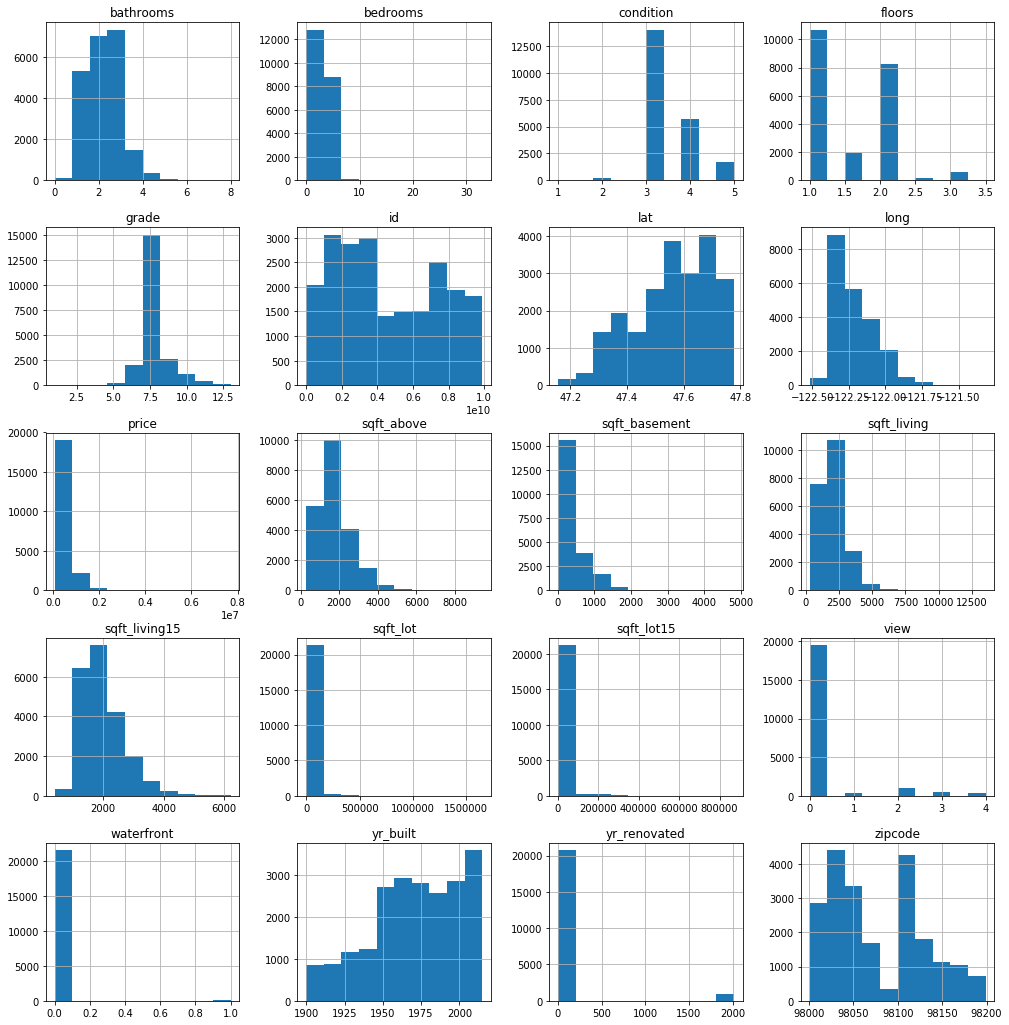

In [9]:
# Plot histogram grid
df.hist(figsize=(17,18),xrot=0)
# Clear the text "residue"
plt.show()

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


---

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="CDf"></span>
> #  Distributions of categorical features


<br>
**First, display the <span style="color:royalblue">summary statistics</span> for categorical features in the dataset.**



In [11]:
# Summarize categorical features
df.describe(include=['object'])

,date
count,21613
unique,372
top,20140623T000000
freq,142


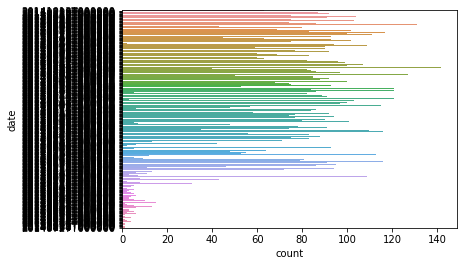

In [12]:
#Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes=='object'].index :
    sns.countplot(y=feature,data=df)
    plt.show()

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

---

Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.


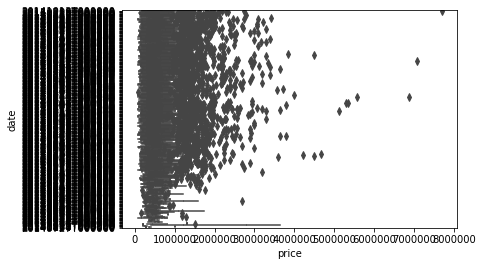

In [13]:
sns.boxplot(y='date', x='price', data=df)

In [14]:
df.groupby('date').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
20140502T000000,4.088342e+09,5.262515e+05,3.402985,2.138060,2102.835821,15640.477612,1.462687,0.000000,0.223881,3.447761,7.835821,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358
20140503T000000,6.709662e+09,4.669700e+05,3.000000,1.812500,1620.000000,8901.000000,1.250000,0.000000,0.000000,3.500000,7.000000,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000
20140504T000000,5.848658e+09,5.766900e+05,3.200000,2.400000,2508.000000,7563.000000,1.400000,0.000000,0.400000,3.400000,8.400000,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000
20140505T000000,4.571210e+09,5.809386e+05,3.523810,2.193452,2257.845238,17966.309524,1.565476,0.000000,0.202381,3.440476,7.833333,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571
20140506T000000,4.553568e+09,5.340479e+05,3.493976,2.171687,2102.168675,12127.662651,1.457831,0.000000,0.120482,3.349398,7.650602,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880
20140507T000000,4.290104e+09,5.402932e+05,3.376344,2.193548,2069.537634,19551.172043,1.478495,0.000000,0.161290,3.483871,7.655914,1747.924731,321.612903,1966.301075,128.322581,98081.139785,47.569767,-122.230000,1932.182796,14230.075269
20140508T000000,4.575766e+09,5.286491e+05,3.259259,1.996914,1948.283951,20541.148148,1.530864,0.012346,0.209877,3.444444,7.580247,1670.135802,278.148148,1970.604938,98.950617,98078.987654,47.555285,-122.209185,2005.259259,16014.259259
20140509T000000,4.888940e+09,5.351154e+05,3.432099,2.253086,2207.506173,22932.037037,1.506173,0.012346,0.271605,3.456790,7.876543,1929.172840,278.333333,1975.185185,123.185185,98064.246914,47.550760,-122.177049,2060.506173,20411.604938
20140510T000000,5.638003e+09,4.809700e+05,3.800000,2.150000,2200.000000,6153.400000,1.600000,0.000000,0.000000,3.400000,7.600000,1496.000000,704.000000,1974.200000,401.400000,98090.800000,47.502080,-122.268800,1746.000000,6118.000000


> ## Correlations

In [15]:
correlation=df.corr()

In [16]:
correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


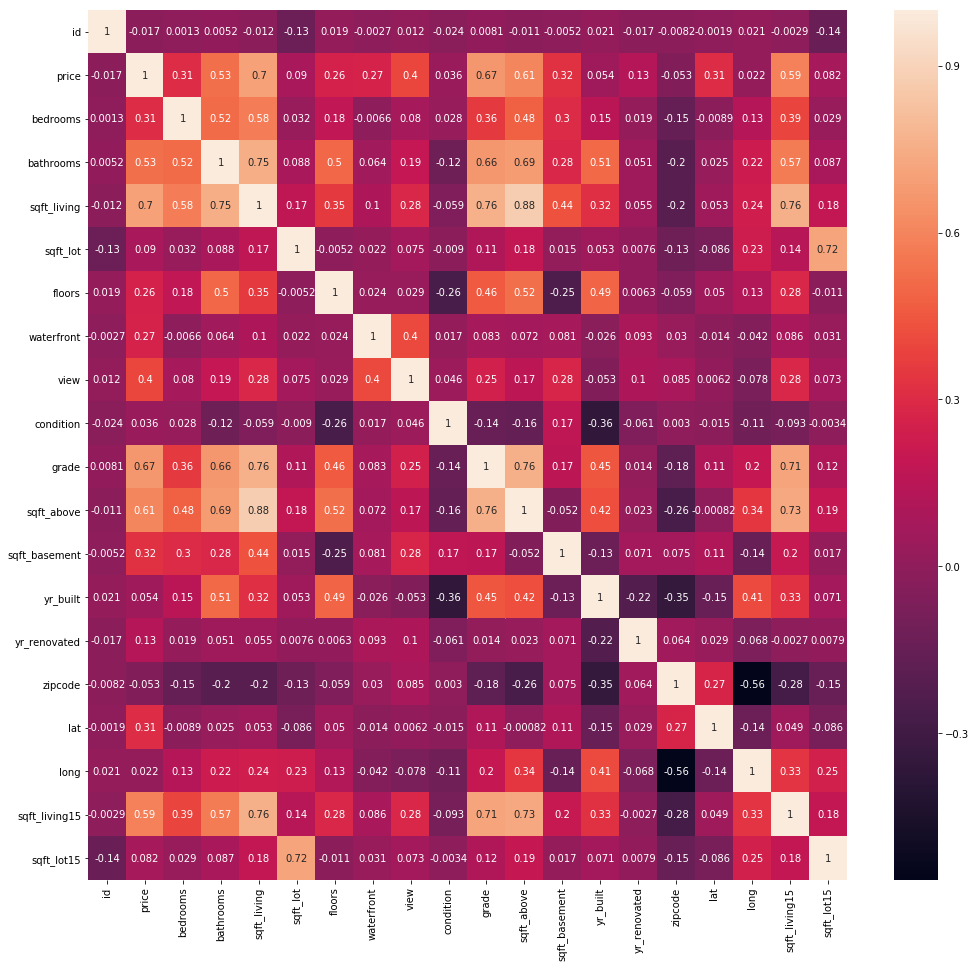

In [17]:
plt.figure(figsize=(17,16))
sns.heatmap(correlation,annot=True)

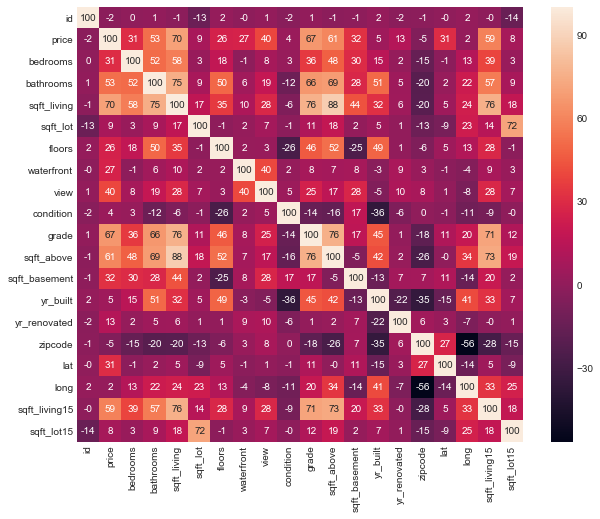

In [18]:
# Change color scheme
sns.set_style("white")
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(correlation * 100, annot=True, fmt='.0f')

In [19]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

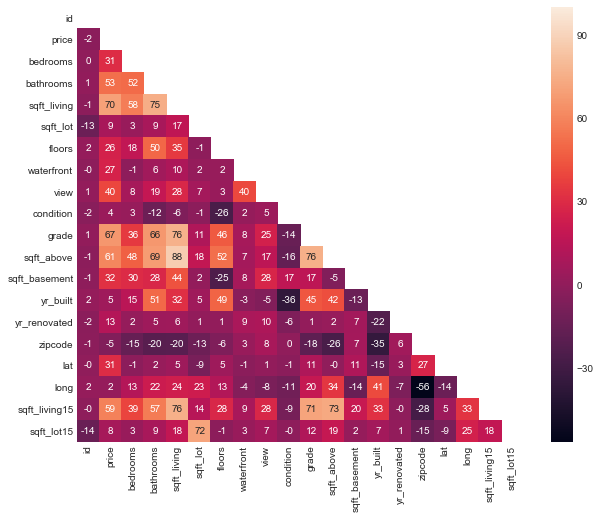

In [20]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlation * 100, annot=True, fmt='.0f', mask=mask)

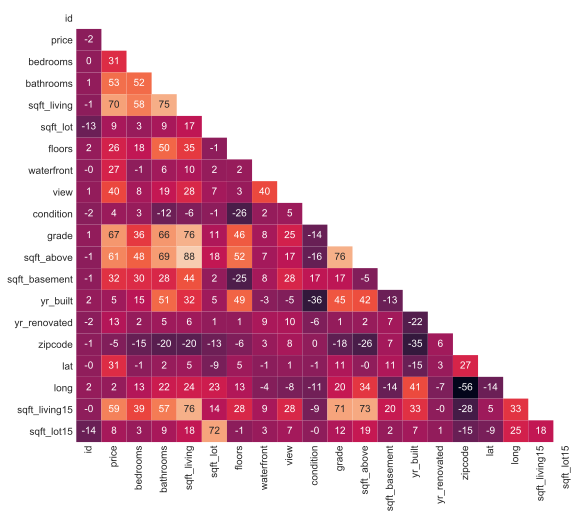

In [21]:
# Make the figsize 9 x 8
plt.figure(figsize=(9,8))
%config InlineBackend.figure_format = 'svg'
# Plot heatmap of correlations
sns.heatmap(correlation * 100, annot=True, fmt='.0f', mask=mask, cbar=False)

In [22]:
dff=df.drop(['id'],axis=1)

In [23]:
corr = dff.corr()

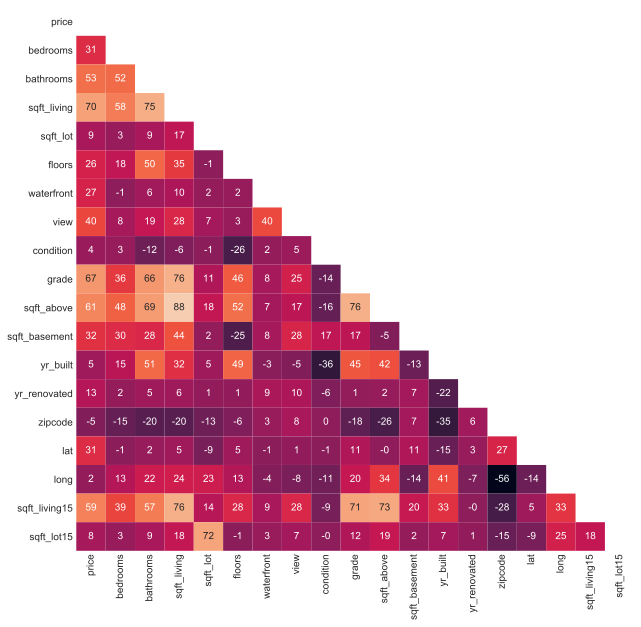

In [ ]:
# Make the figsize 9 x 8
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
%config InlineBackend.figure_format = 'svg'
# Plot heatmap of correlations
sns.heatmap(corr * 100, annot=True, fmt='.0f', mask=mask, cbar=False)
plt.savefig('corr_HeatMap')

### Correlation and Multicollinearity


In [ ]:
sns.pairplot(df, size = 1.2, aspect=1.5);

In [10]:
df['zipcode_f'] = df['zipcode'].astype('category')

In [11]:
df['zipcode_f'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode_f, Length: 70, dtype: int64

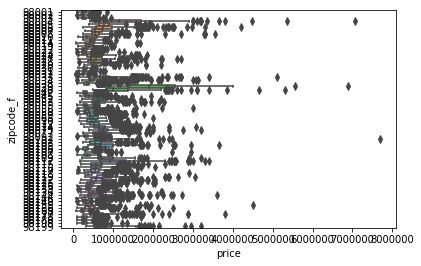

In [12]:
sns.boxplot(x='price',y='zipcode_f',data=df)

In [26]:
x=df.groupby('zipcode_f')['price'].mean()

In [62]:
x.head()

zipcode_f
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
Name: price, dtype: float64

In [35]:
bins = pd.qcut(x, 4,labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [50]:
bins[bins=='Q1'].index

CategoricalIndex([98001, 98002, 98003, 98022, 98023, 98030, 98031, 98032,
                  98042, 98055, 98058, 98092, 98106, 98148, 98168, 98178,
                  98188, 98198],
                 categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, ...], ordered=False, name='zipcode_f', dtype='category')

In [51]:
bins[bins=='Q2'].index

CategoricalIndex([98010, 98011, 98014, 98019, 98028, 98038, 98045, 98056,
                  98070, 98108, 98118, 98125, 98126, 98133, 98146, 98155,
                  98166],
                 categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, ...], ordered=False, name='zipcode_f', dtype='category')

In [55]:
results = (pd.Series(x)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())

In [57]:
q4=bins[bins=='Q4'].index

In [58]:
q3=bins[bins=='Q3'].index

In [61]:
for i,j in zip(q3,q4):
    if i==j :
        print (i)

In [41]:
results

,price,count,min,max
0,Q1,18,234284.035176,3.536086e+05
1,Q2,17,355678.516129,4.903515e+05
2,Q3,17,493552.532051,6.452315e+05
3,Q4,18,645507.378092,2.160607e+06


In [ ]:
sns.countplot()

In [36]:
bins

zipcode_f
98001    Q1
98002    Q1
98003    Q1
98004    Q4
98005    Q4
98006    Q4
98007    Q3
98008    Q4
98010    Q2
98011    Q2
98014    Q2
98019    Q2
98022    Q1
98023    Q1
98024    Q3
98027    Q3
98028    Q2
98029    Q3
98030    Q1
98031    Q1
98032    Q1
98033    Q4
98034    Q3
98038    Q2
98039    Q4
98040    Q4
98042    Q1
98045    Q2
98052    Q3
98053    Q4
         ..
98092    Q1
98102    Q4
98103    Q3
98105    Q4
98106    Q1
98107    Q3
98108    Q2
98109    Q4
98112    Q4
98115    Q3
98116    Q3
98117    Q3
98118    Q2
98119    Q4
98122    Q3
98125    Q2
98126    Q2
98133    Q2
98136    Q3
98144    Q3
98146    Q2
98148    Q1
98155    Q2
98166    Q2
98168    Q1
98177    Q4
98178    Q1
98188    Q1
98198    Q1
98199    Q4
Name: price, Length: 70, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [32]:
x.sort_values(axis=0,ascending=False)

zipcode_f
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
98109    8.796236e+05
98105    8.628252e+05
98006    8.596848e+05
98119    8.494480e+05
98005    8.101649e+05
98033    8.037195e+05
98199    7.918208e+05
98075    7.905767e+05
98074    6.856058e+05
98077    6.827749e+05
98053    6.781631e+05
98177    6.761854e+05
98008    6.455074e+05
98052    6.452315e+05
98122    6.343602e+05
98115    6.199005e+05
98116    6.186342e+05
98007    6.171051e+05
98027    6.169906e+05
98029    6.126536e+05
98144    5.945477e+05
98103    5.849192e+05
98024    5.805268e+05
98107    5.790534e+05
98117    5.767950e+05
             ...     
98014    4.556171e+05
98045    4.394711e+05
98019    4.247887e+05
98126    4.247064e+05
98155    4.237257e+05
98010    4.236660e+05
98056    4.208905e+05
98118    4.176374e+05
98133    3.869974e+05
98038    3.668676e+05
98146    3.594832e+05
98108    3.556785e+05
98058    3.536086e+05
98092    3.349211e+05


In [21]:
y=df['zipcode_f'].unique()

In [23]:
len(x)

70

In [24]:
len(y)

70

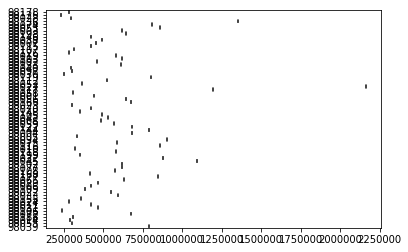

In [25]:
sns.boxplot(x,y)

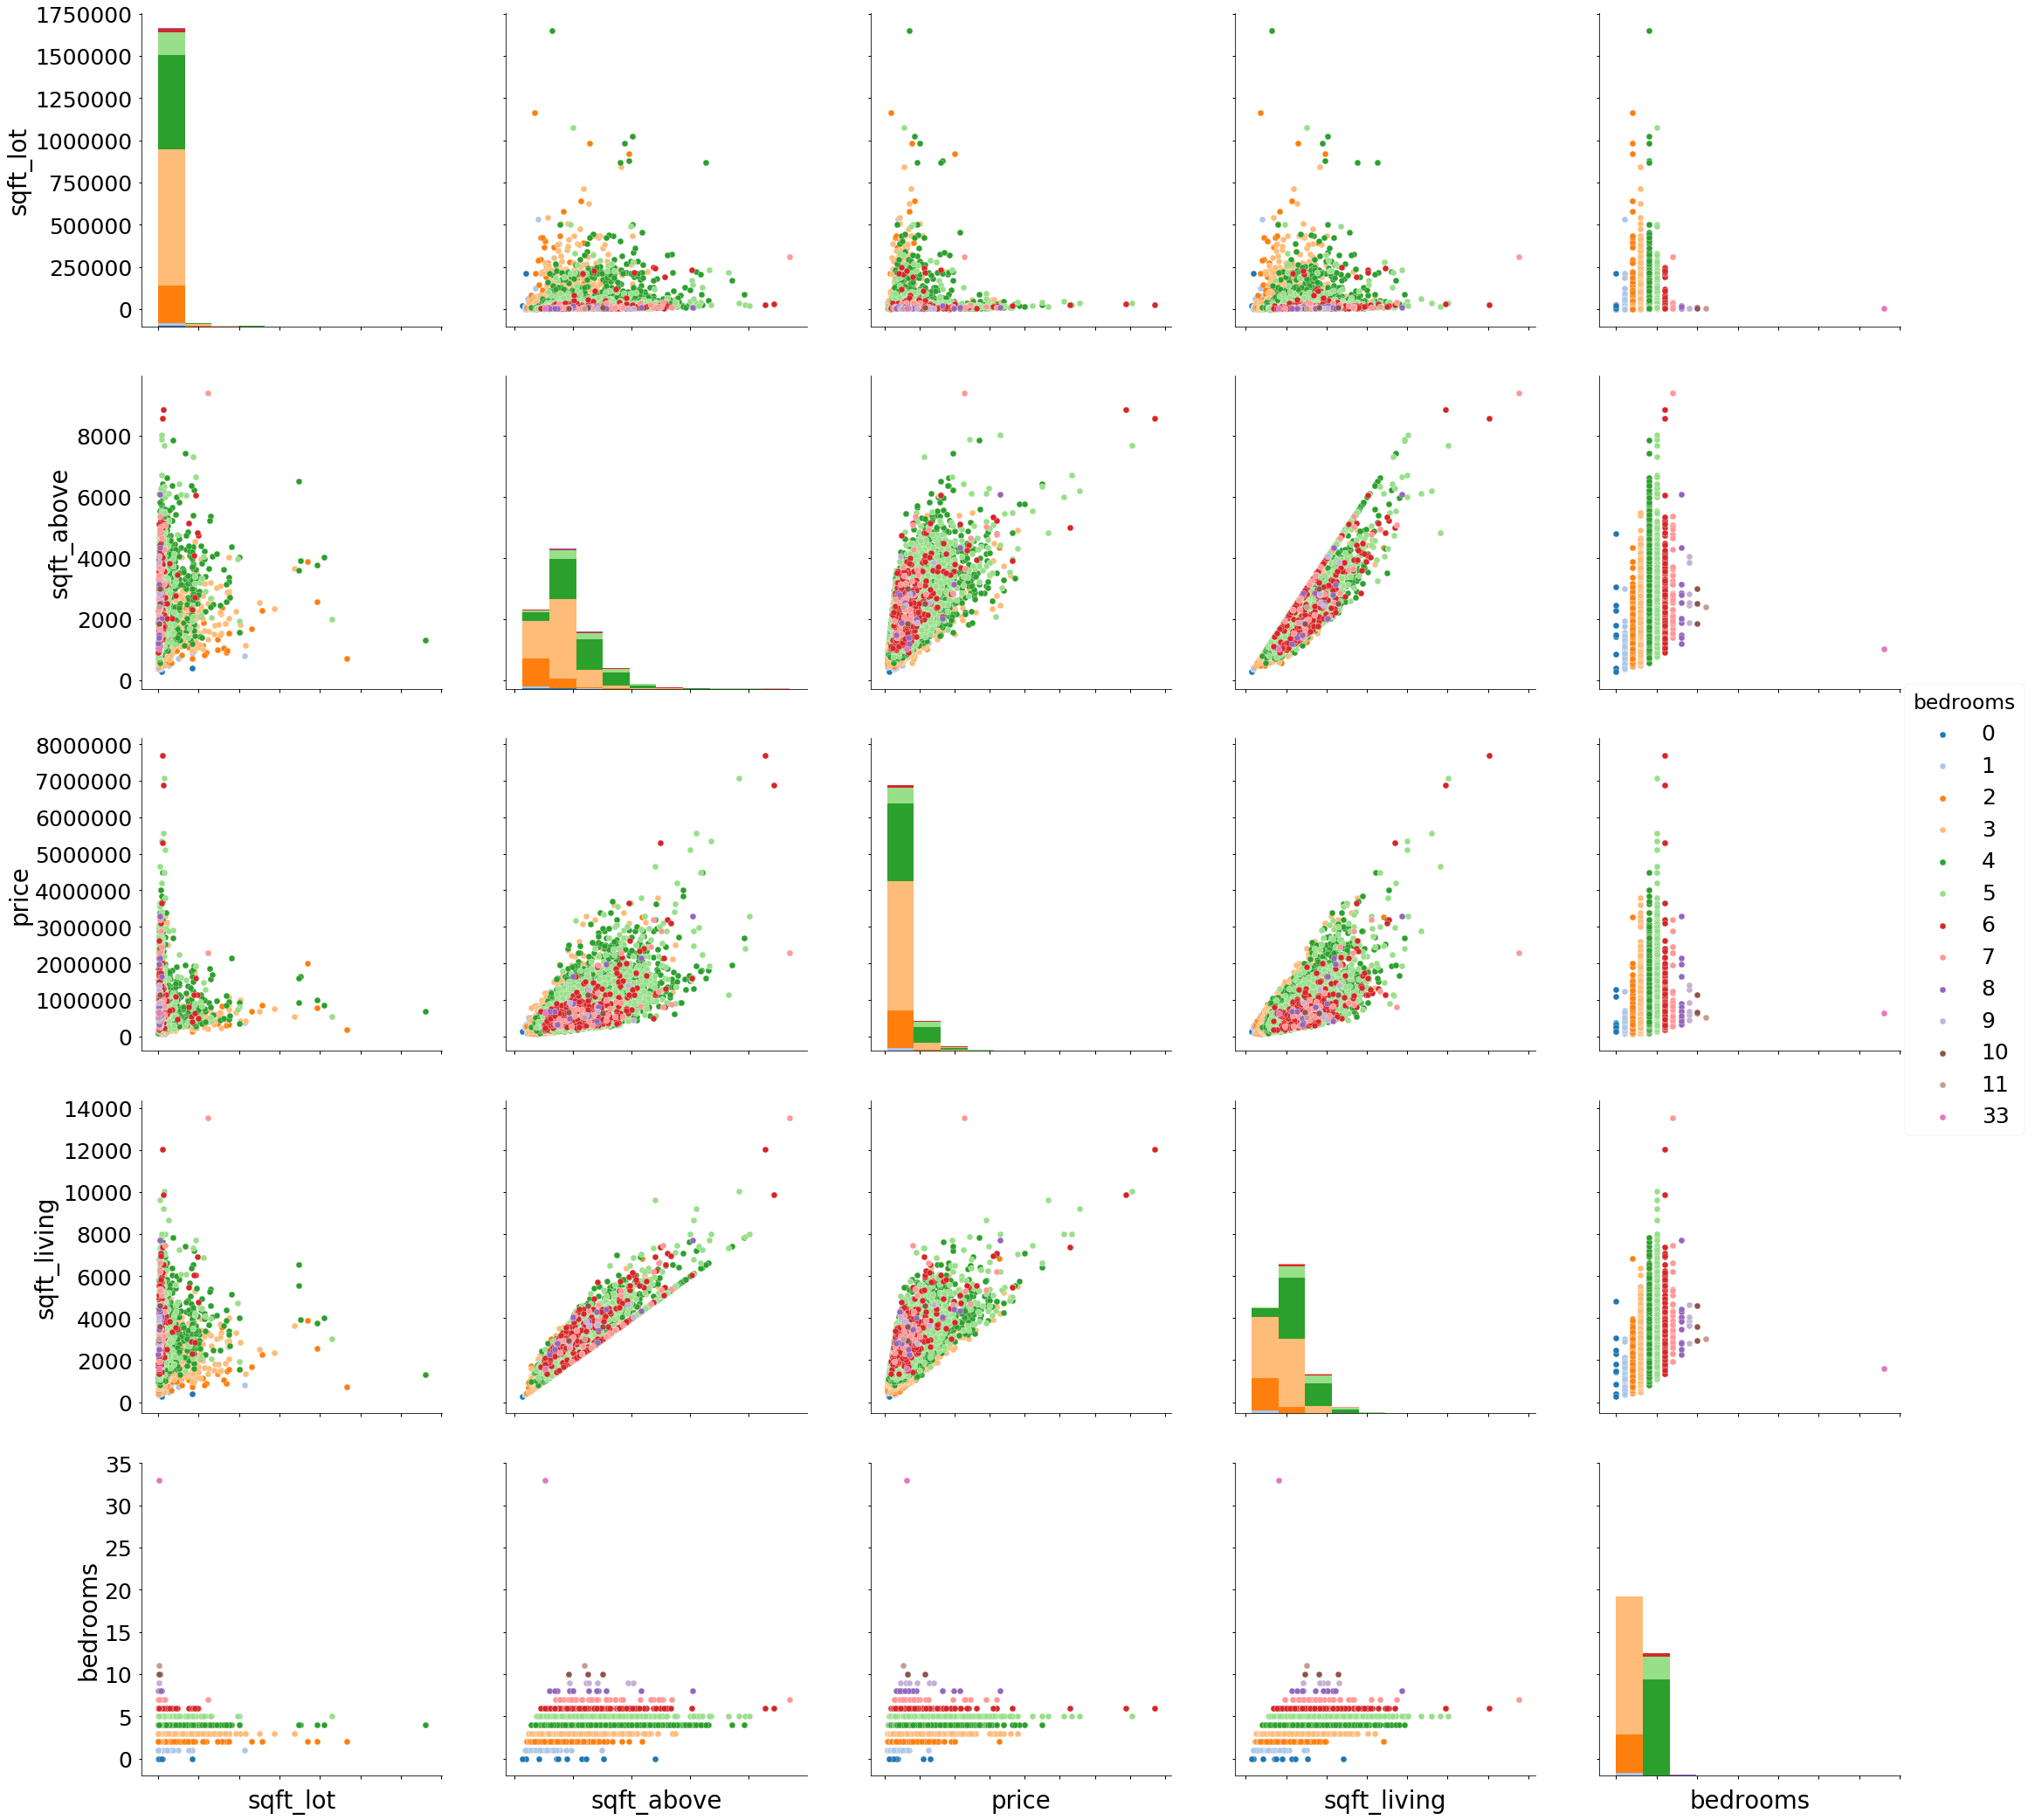

In [63]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [69]:
col=df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode_f'],
      dtype='object')

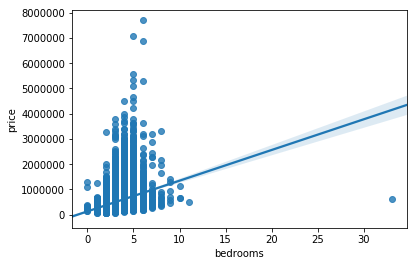

In [66]:
ax = sns.regplot(x="bedrooms", y="price", data=df)

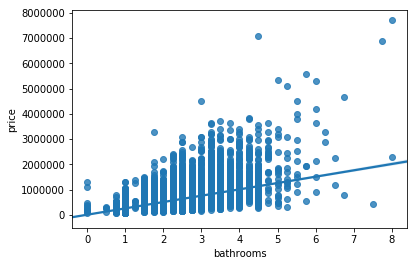

In [67]:
ax = sns.regplot(x="bathrooms", y="price", data=df)

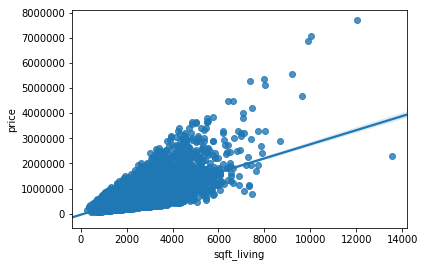

In [68]:
ax = sns.regplot(x="sqft_living", y="price", data=df)

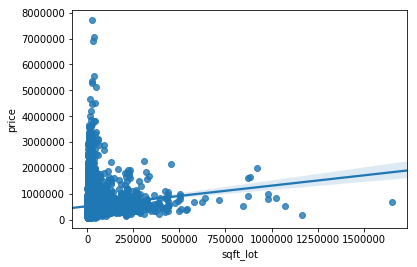

In [71]:
ax = sns.regplot(x="sqft_lot", y="price", data=df)

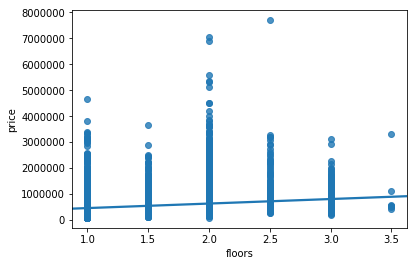

In [72]:
ax = sns.regplot(x="floors", y="price", data=df)

In [76]:
df.groupby('waterfront')['price'].agg(['count', 'min', 'max']).reset_index()

,waterfront,count,min,max
0,0,21450,75000.0,7700000.0
1,1,163,285000.0,7062500.0


In [77]:
df.groupby('view')['price'].agg(['count', 'min', 'max']).reset_index()

,view,count,min,max
0,0,19489,75000.0,5570000.0
1,1,332,217000.0,3650000.0
2,2,963,169317.0,7062500.0
3,3,510,154000.0,7700000.0
4,4,319,252000.0,6885000.0


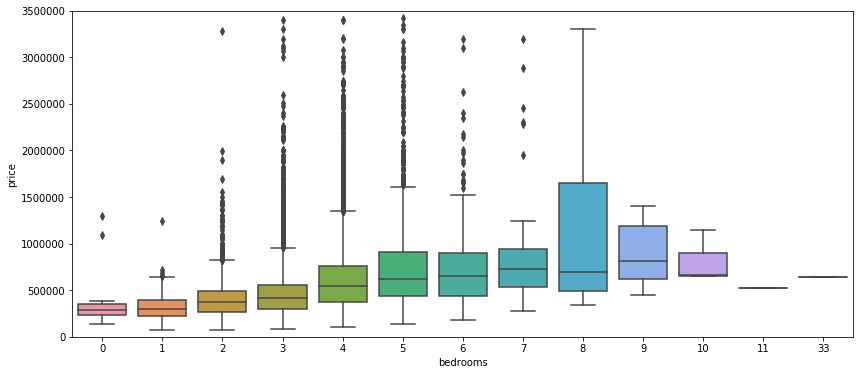

In [79]:
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

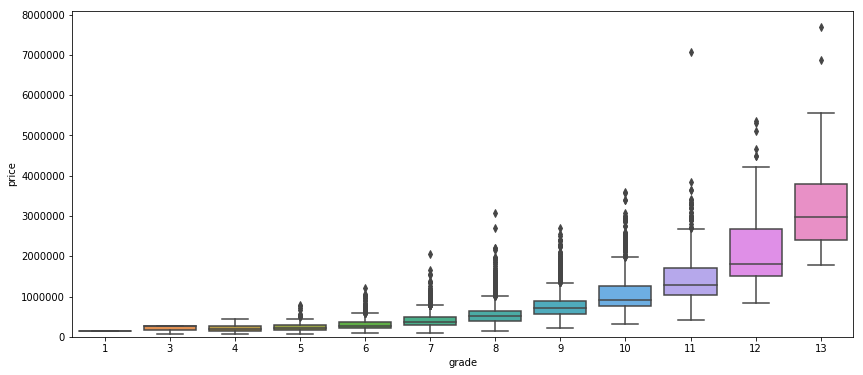

In [86]:
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8100000);

In [80]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

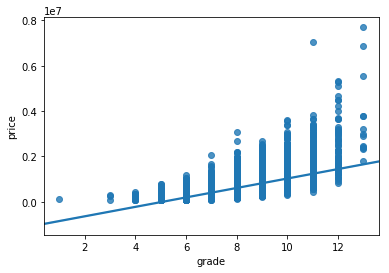

In [87]:
ax = sns.regplot(x="grade", y="price", data=df)

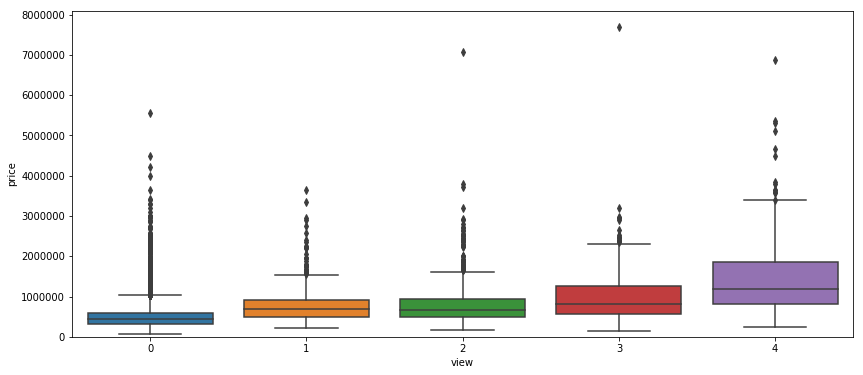

In [89]:
var = 'view'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8100000);

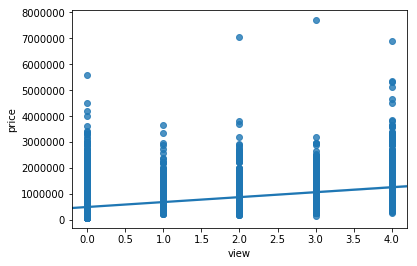

In [90]:
ax = sns.regplot(x="view", y="price", data=df)

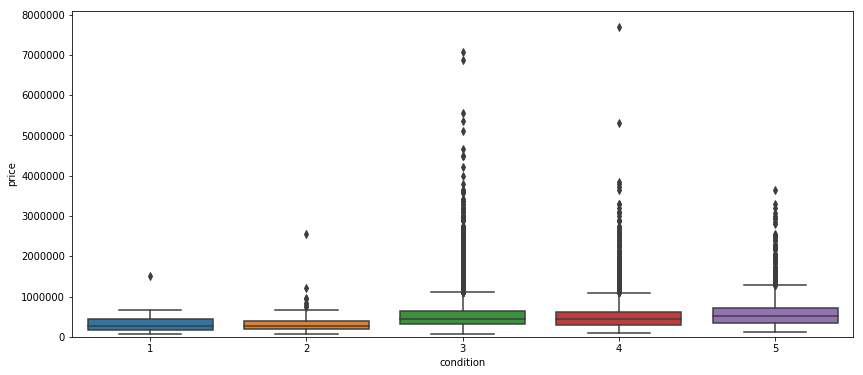

In [91]:
var = 'condition'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8100000);

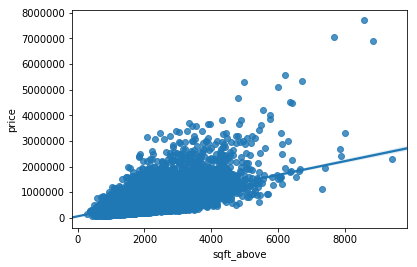

In [4]:
ax = sns.regplot(x="sqft_above", y="price", data=df)

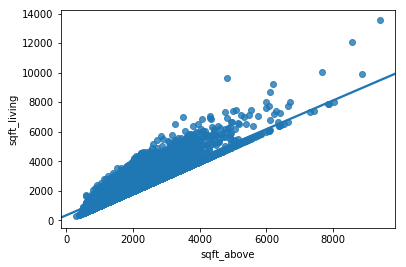

In [6]:
ax = sns.regplot(x="sqft_above", y='sqft_living', data=df)

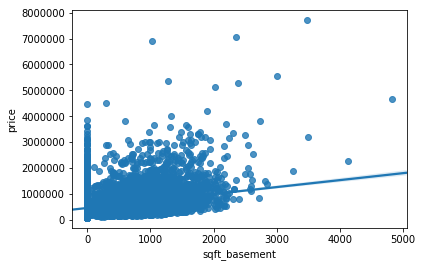

In [8]:
ax = sns.regplot(x="sqft_basement", y='price', data=df)

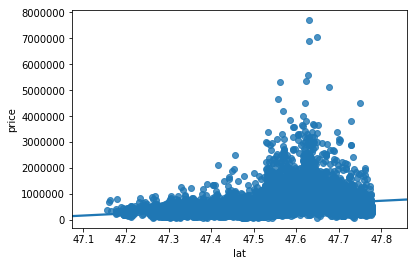

In [9]:
ax = sns.regplot(x="lat", y='price', data=df)

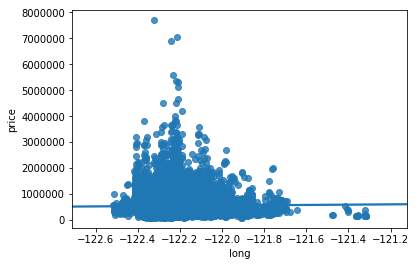

In [10]:
ax = sns.regplot(x="long", y='price', data=df)

In [11]:
len(df['long'].unique())

752

In [12]:
len(df['lat'].unique())

5034